# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [1]:
# Use "pip install py3-validate-email" to install below package
from validate_email import validate_email
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [2]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [3]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)

,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [4]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [5]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [6]:
sqlite_query = """
SELECT 
*
from Fund_Table
limit 5

"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,None
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,None
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,None


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [7]:
sqlite_query = """
SELECT 
"Product Category","Product Name", round(avg("Policy Value"),2) "Avg by Product"
from Policy_Table
group by "Product Name", "Product Category"
"""

pd.read_sql(sqlite_query, conn)

,Product Category,Product Name,Avg by Product
0,PENSION,CORPORATE MEMBERSHIP,5697.29
1,ISA,FOCUSSED ISA,5746.34
2,PENSION,NHS PENSION,5241.50
3,BOND,PRU BOND,4516.39
4,BOND,PRUDENTIAL INVESTMENT PLAN,5084.52
5,ISA,PRUDENTIAL ISA,5161.14
6,RETIREMENT,RETIREMENT ACCOUNT,504964.96
7,PENSION,SIPP,5335.84
8,ANNUITY,STANDARD ANNUITY,NaN


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [8]:
sqlite_query = """
SELECT * 
from POLICY_TABLE
where "Customer Id" in
(SELECT "Customer Id" from POLICY_TABLE where "Customer Id" in
    (SELECT distinct "Customer Id" from POLICY_TABLE
        where "Policy Start Date" between '01-Jan-2017' and '31-Mar-2017')
        and
"Policy Start Date" < '01-Jan-2017' and "Product Category" = 'PENSION')
"""
pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date


## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [13]:
sqlite_query = """
SELECT "Customer Id", "Policy Number", "Highest Value" from (
SELECT "Customer Id", "Policy Number", "Highest Value", rank() over(order by "Highest Value" desc) rank from (
SELECT q1."Customer Id", q1."Policy Number", q1.policy_value_snapshot - q2.policy_value_snapshot as "Highest Value"
from (SELECT p."Customer Id", p."Policy Number", p.date, p.policy_value_snapshot from Fund_Table p 
 inner join
   (SELECT p."Customer Id", p."Policy Number", max(p.date) max_dt from Fund_Table p 
     group by p."Customer Id", p."Policy Number") m1
     on p."Customer Id" = m1."customer id"
     and p."Policy Number" = m1."Policy Number"
     and p.date = m1.max_dt) q1
 inner join
     (SELECT p."Customer Id", p."Policy Number", p.date, p."policy_value_snapshot" from Fund_Table p
 inner join
     (SELECT p."Customer Id", p."Policy Number", min(p.date) as min_dt from Fund_Table p 
     group by p."Customer Id", p."Policy Number") m2
     on p."Customer Id" = m2."Customer Id" 
     and p."Policy Number" = m2."Policy Number"
     and p.date = m2.min_dt) q2

on q1."Customer Id" = q2."Customer Id"
and q1."Policy Number" = q2."Policy Number"

)) where rank=1

"""
pd.read_sql(sqlite_query, conn,)

,Customer Id,Policy Number,Highest Value
0,CO401070,RET100479,943283.5


# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [14]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [15]:
def is_email_valid(email_id):
    """
    Verify if an email is valid by checking its format, can send or
    receive emails, is blacklisted or not.
    
    Enabling check_dns and check_smtp will make this program run
    for a very long time.
    
    """
    if email_id and isinstance(email_id, str):
        result = validate_email(email_address=email_id, check_format=True, check_blacklist=True,
                              check_dns=False, dns_timeout=30, check_smtp=False, smtp_timeout=30,
                              smtp_helo_host='my.host.name', smtp_from_address='my@from.addr.ess',
                              smtp_debug=False)
        return "Yes" if result else "No"
    return "Not filled"

In [16]:
def get_location_by_email(email_id):
    """
    Get the location of customers from the domain.
    """    
    
    if email_id and isinstance(email_id, str):
        location = email_id.split(".")[-1]
        if location.lower()=="com": # if location is .com
            return "Global"
        return location

In [17]:
Customer_Table["Is Email Valid"] = Customer_Table["Email"].apply(is_email_valid)
Customer_Table["Location"] = Customer_Table["Email"].apply(get_location_by_email)

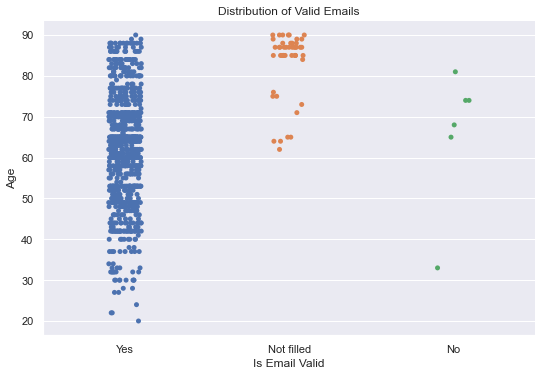

In [18]:
%matplotlib inline
sns.set(style="darkgrid")
title="Distribution of Valid Emails"
sns.catplot(x="Is Email Valid", y="Age", data=Customer_Table, height=5, aspect=1.5).set(title=title)

# Customers over 60 years of age either do not use email id or provided an invalid email

## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


In [19]:
df1 = Policy_Table.merge(Customer_Table, how="inner", on="Customer ID")

#### a) Policy value on the basis of Customer location

In [20]:
df_valid = df1.dropna()
df_valid = df_valid[df_valid["Is Email Valid"] == "Yes"]

In [21]:
loc_x = df_valid[["Location", "Policy Value"]].groupby(["Location"]).sum()

In [22]:
## Remove global (.com) and other institutions
loc = loc_x.drop(["Global", "EDU", "GOV", "ORG", "INFO", "NET"],axis=0).reset_index()

In [23]:
loc.dropna(inplace=True)

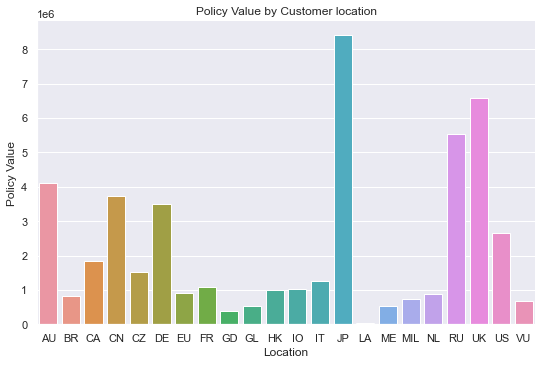

In [24]:
%matplotlib inline
sns.set(style="darkgrid")
sns.catplot(kind="bar", x="Location", y="Policy Value", data=loc,
            height=5, aspect=1.5).set(title="Policy Value by Customer location")

# Japan (JP), United Kingdom (UK) and Russia (RU) are the top 3 countries with customers of high policy value

#### b) Policy value by Customer age and Gender

In [25]:
df_dem = df1[["Age", "Policy Value", "Gender"]].groupby([pd.cut(df1["Age"], np.arange(0, 110, 10)), "Gender"]).mean()
df_dem.drop(columns=["Age"], inplace=True)
df_dem.dropna(inplace=True)
new_sz = df_dem.reset_index()

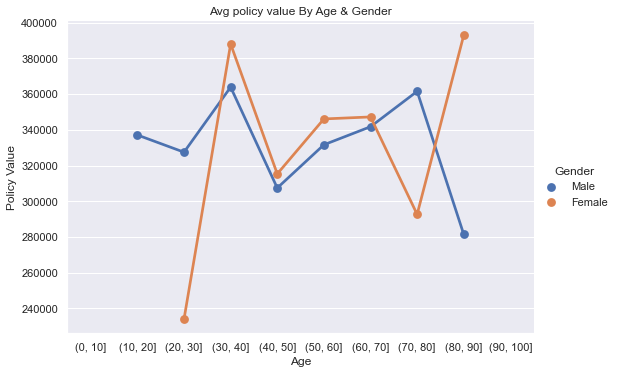

In [26]:
%matplotlib inline
sns.set(style="darkgrid")
sns.catplot(kind="point", x="Age", y="Policy Value", hue="Gender", data=new_sz,
            height=5, aspect=1.5, legend_out=True).set(title="Avg policy value By Age & Gender")

# Females between the age of 30-70 and above 80 years have more policy value than males of the same age group

#### c) Policies opened by Quarter

In [27]:
df1['Policy Start Date'] = pd.to_datetime(df1['Policy Start Date'])
df1["Policy Start Month"] = df1["Policy Start Date"].dt.month
df1["Policy Start Year"] = df1["Policy Start Date"].dt.year
month_cnt=df1["Policy Value"].groupby([pd.cut(df1["Policy Start Month"], np.arange(0, 13, 3))]).count()
month_cnt = month_cnt.reset_index()

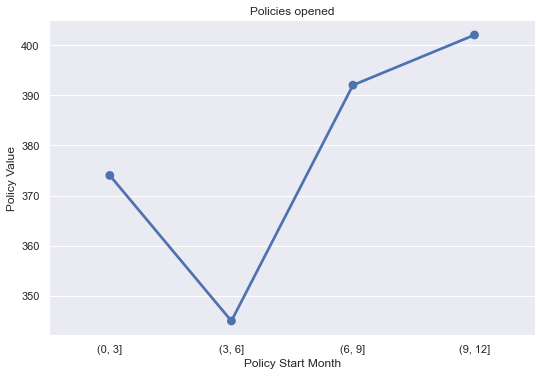

In [28]:
%matplotlib inline
sns.set(style="darkgrid")
sns.catplot(kind="point", x="Policy Start Month", y="Policy Value", data=month_cnt,
            height=5, aspect=1.5, legend_out=True).set(title="Policies opened")

# Customers are buying more policies between Q2 and Q4